In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
runs = pd.read_csv('./Running.csv')


In [4]:
print(runs.columns)

Index(['Activity Type', 'Date', 'Favorite', 'Title', 'Distance', 'Calories',
       'Time', 'Avg HR', 'Max HR', 'Aerobic TE', 'Avg Run Cadence',
       'Max Run Cadence', 'Avg Pace', 'Best Pace', 'Total Ascent',
       'Total Descent', 'Avg Stride Length', 'Avg Vertical Ratio',
       'Avg Vertical Oscillation', 'Avg Ground Contact Time',
       'Avg GCT Balance', 'Avg GAP', 'Normalized Power® (NP®)',
       'Training Stress Score®', 'Avg Power', 'Max Power', 'Steps', 'Min Temp',
       'Decompression', 'Best Lap Time', 'Number of Laps', 'Max Temp',
       'Avg Resp', 'Min Resp', 'Max Resp', 'Moving Time', 'Elapsed Time',
       'Min Elevation', 'Max Elevation'],
      dtype='object')


In [5]:
runs['Date'] = pd.to_datetime(runs['Date'])
runs['Avg Run Cadence'] = pd.to_numeric(runs['Avg Run Cadence'], errors='coerce')
runs['Max Run Cadence'] = pd.to_numeric(runs['Max Run Cadence'], errors='coerce')
runs['Avg Pace'] = runs['Avg Pace'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]))
runs['Date_ordinal']= runs['Date'].map(pd.Timestamp.toordinal)


<Axes: xlabel='Date'>

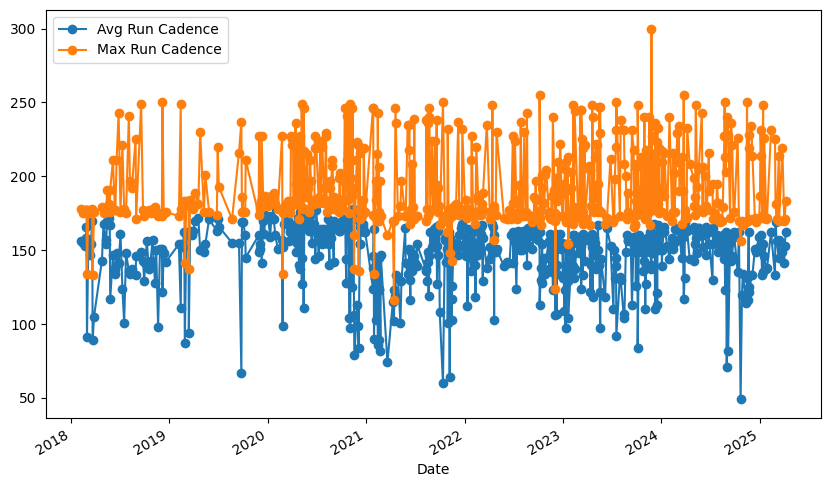

In [6]:
runs.plot(x='Date', y=['Avg Run Cadence', 'Max Run Cadence'], figsize=(10, 6), marker='o')

In [7]:
print(runs['Avg Run Cadence'].mean())

147.53140096618358


In [18]:
print(runs[runs['Max Run Cadence']> 250])

         Activity Type                Date  Favorite                   Title  \
81       Trail Running 2024-03-24 10:13:32     False  Issaquah Trail Running   
121  Treadmill Running 2023-11-25 15:35:14     False       Treadmill Running   
255            Running 2022-10-06 08:39:42     False         Seattle Running   

     Distance Calories      Time  Avg HR  Max HR Aerobic TE  ...  \
81      25.02    1,786  04:33:18     141     173        4.5  ...   
121      3.80      220  00:34:56     127     146        2.2  ...   
255      4.74      397  00:57:08     137     170        3.0  ...   

     Number of Laps  Max Temp  Avg Resp Min Resp Max Resp Moving Time  \
81               26        --        31       15       42    03:58:48   
121               1        --        --       --       --    00:29:16   
255               2      23.0        --       --       --    00:45:07   

    Elapsed Time Min Elevation Max Elevation Date_ordinal  
81      04:38:24           161           838       73

In [8]:
filtered_runs = runs[runs['Avg Pace'] <= 420]

In [9]:
avg_avg = filtered_runs['Avg Run Cadence'].mean()
print(avg_avg)

161.11371237458195


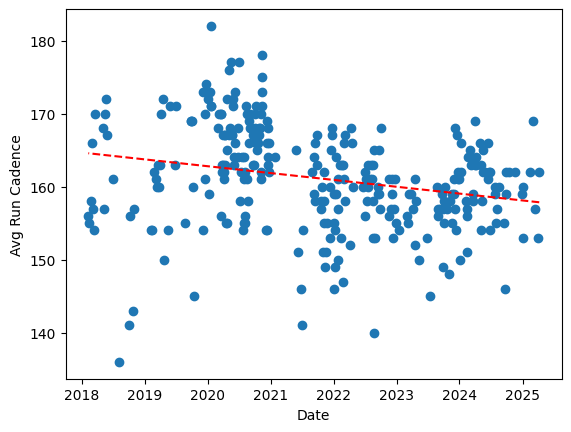

In [10]:
filtered_runs = filtered_runs.dropna(subset=['Date', 'Avg Run Cadence'])
plt.scatter(filtered_runs['Date'], filtered_runs['Avg Run Cadence'])
coeffs = np.polyfit(filtered_runs['Date_ordinal'], filtered_runs['Avg Run Cadence'], deg=1)
trendline = np.poly1d(coeffs)

# Plot trendline
plt.plot(filtered_runs['Date'], trendline(filtered_runs['Date_ordinal']), color='red', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Avg Run Cadence')
plt.show()

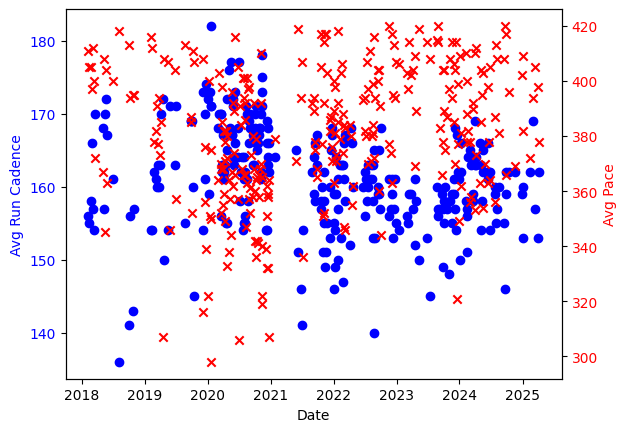

In [11]:
fig, ax1 = plt.subplots()

# First scatter plot (left y-axis)
ax1.scatter(filtered_runs['Date'], filtered_runs['Avg Run Cadence'], color='blue', label='Avg Cadence')
ax1.set_xlabel('Date')
ax1.set_ylabel('Avg Run Cadence', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Second scatter plot (right y-axis)
ax2.scatter(filtered_runs['Date'], filtered_runs['Avg Pace'], color='red', marker='x', label='Avg Pace')
ax2.set_ylabel('Avg Pace', color='red')
ax2.tick_params(axis='y', labelcolor='red')



plt.show()

In [12]:
avg_avg = filtered_runs['Avg Run Cadence'].mean()
print(avg_avg)

161.11371237458195


In [13]:
print(filtered_runs[filtered_runs['Date']< '2021-01-01']['Avg Run Cadence'].mean())


164.24812030075188


In [14]:
print(filtered_runs[filtered_runs['Date']> '2021-01-01']['Avg Run Cadence'].mean())

158.6024096385542


In [16]:
print(filtered_runs[filtered_runs['Max Run Cadence']> 250])

Empty DataFrame
Columns: [Activity Type, Date, Favorite, Title, Distance, Calories, Time, Avg HR, Max HR, Aerobic TE, Avg Run Cadence, Max Run Cadence, Avg Pace, Best Pace, Total Ascent, Total Descent, Avg Stride Length, Avg Vertical Ratio, Avg Vertical Oscillation, Avg Ground Contact Time, Avg GCT Balance, Avg GAP, Normalized Power® (NP®), Training Stress Score®, Avg Power, Max Power, Steps, Min Temp, Decompression, Best Lap Time, Number of Laps, Max Temp, Avg Resp, Min Resp, Max Resp, Moving Time, Elapsed Time, Min Elevation, Max Elevation, Date_ordinal]
Index: []

[0 rows x 40 columns]
